In [1]:
import tensorflow as tf
from glob import glob
import numpy as np
import faiss
import matplotlib.pyplot as plt
import random

In [2]:
class Similarity():
    def __init__(self):
        self.train = sorted(glob('dataset/train/*/*'))
        self.test = sorted(glob('dataset/val/*/*'))
        self.embedding = np.load('embedding.npy')
        self.base = tf.keras.models.load_model('base.h5')
        self.idx = {v: i for i, v in enumerate(self.test)}
        
    def index(self):
        f = faiss.IndexFlatL2(2048)
        f.add(np.float32(self.embedding))
        return f
        
    def predict(self):
        result = []
        for i in self.test:
            img = tf.keras.preprocessing.image.load_img(i, target_size=(331, 331, 3))
            img = tf.keras.preprocessing.image.img_to_array(img)
            img = tf.keras.applications.xception.preprocess_input(img)
            pred = self.base.predict(img[None, ...])[0]
            result.append(pred)
        return np.asarray(result)
        
    def search(self):
        f = self.index()
        _, I = f.search(self.predict(), 4)
        return I

In [3]:
s = Similarity()
I = s.search()

W0820 21:22:25.497265 140357790586688 deprecation.py:506] From /home/rtx/anaconda3/envs/test/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0820 21:22:25.497952 140357790586688 deprecation.py:506] From /home/rtx/anaconda3/envs/test/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0820 21:22:25.498355 140357790586688 deprecation.py:506] From /home/rtx/anaconda3/envs/test/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros

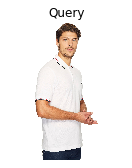

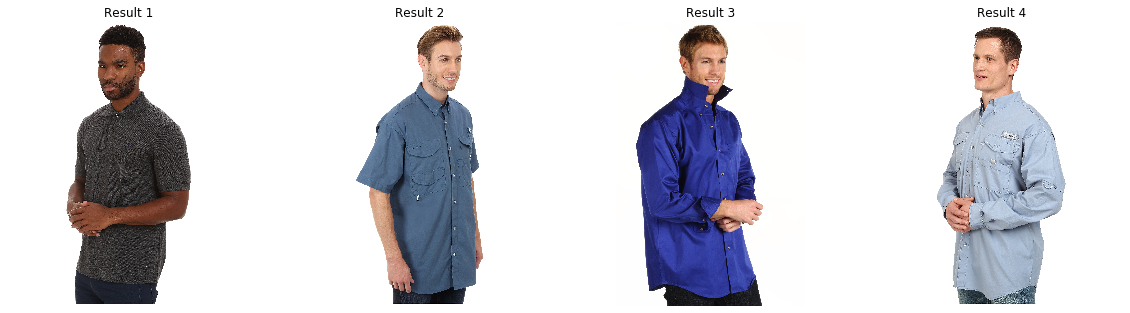

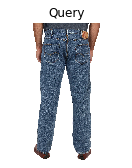

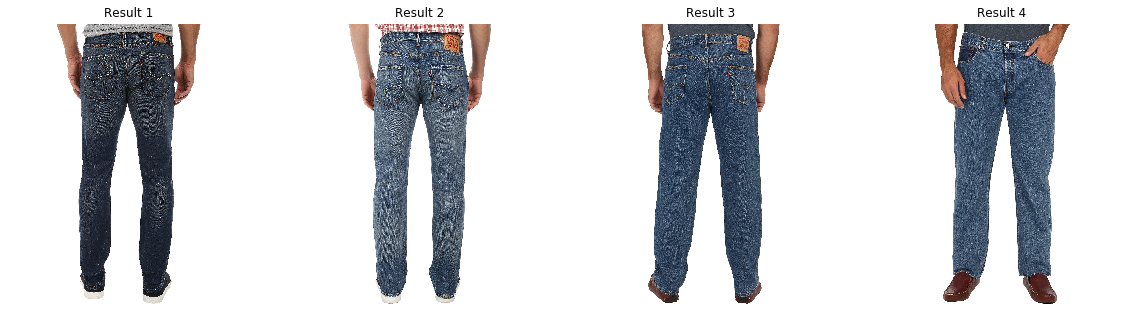

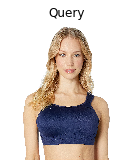

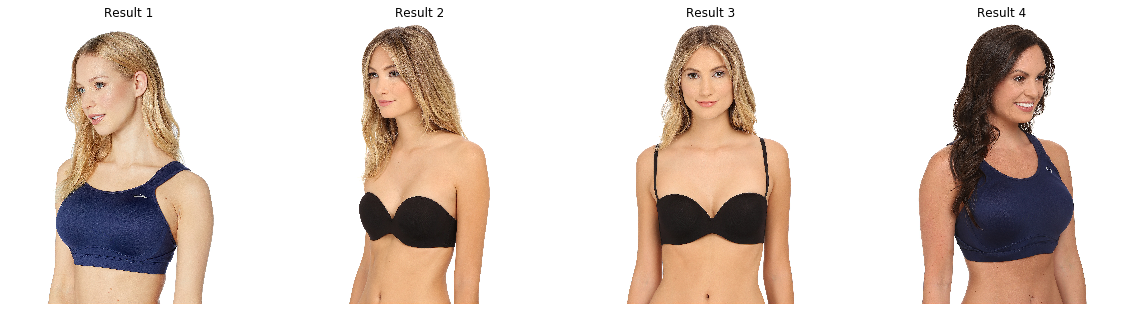

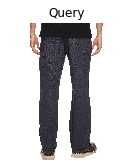

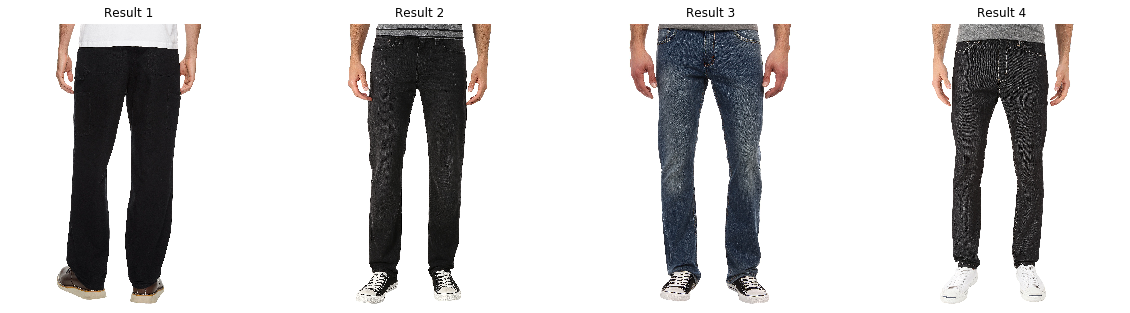

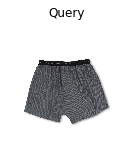

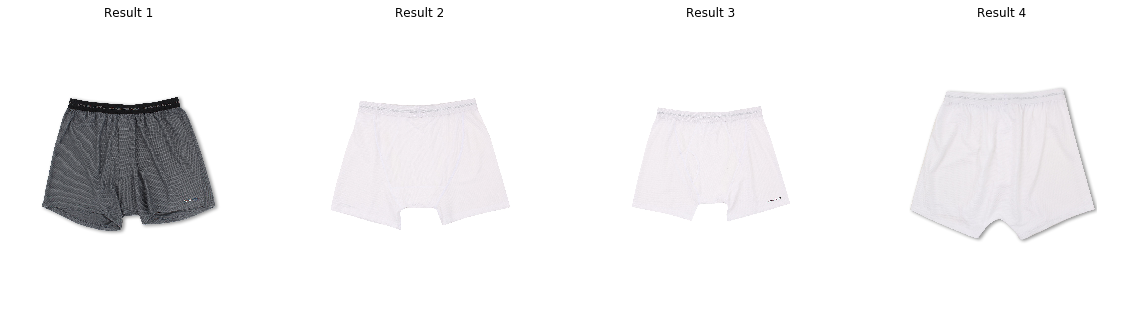

In [4]:
rand = random.choices(s.test, k=5)
for i, v in enumerate(rand):
    fig1 = plt.figure(figsize=(30,30))
    ax = fig1.add_subplot(10, 1, i+1)
    ax.set_title('Query')
    ax.imshow(plt.imread(v)/255.)
    ax.axis('off')
    
    fig2 = plt.figure(figsize=(20,20))
    for j, k in enumerate(I[s.idx[rand[i]]]):
        ax = fig2.add_subplot(1, 4, j+1)
        ax.set_title(f'Result {j+1}')
        ax.imshow(plt.imread(s.train[k]))
        ax.axis('off')